# KNN Classification

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

df = pd.read_csv("iris.csv")

In [98]:
df[df.Species == "Iris-setosa"].tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
45,46,4.8,3.0,1.4,0.3,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa
47,48,4.6,3.2,1.4,0.2,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
49,50,5.0,3.3,1.4,0.2,Iris-setosa


In [99]:
df[df.Species == "Iris-versicolor"].tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor


In [100]:
df[df.Species == "Iris-virginica"].tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Using LabelEncoder to change the target variables from alpha to numerical type

In [101]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Target"] = LE.fit_transform(df["Species"])

In [102]:
df.head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0


In [103]:
target = df["Target"]

### Split the dataset into 3 types as there are three categories

In [105]:
zero = df[:50]
one = df[50:100]
two = df[100:]

### Visualization

In [106]:
import matplotlib.pyplot as plt

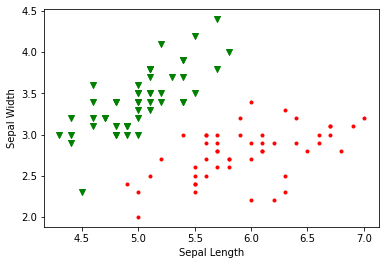

In [178]:
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.scatter(zero["SepalLengthCm"], zero["SepalWidthCm"],color='g',marker = "v")
plt.scatter(one["SepalLengthCm"], one["SepalWidthCm"],color='r',marker = ".")
#plt.scatter(two["SepalLengthCm"], two["SepalWidthCm"],color='b',marker = "o")

### Test Train Split

In [109]:
from sklearn.model_selection import train_test_split

X = df.drop(["Target","Species"], axis = 'columns')
y = df.Target

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) 

In [115]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

120
120
30
30


In [198]:
ydf = y_test
ydf = ydf.to_frame().reset_index()
ydf.columns = ["Id","Species"]
for i in ydf.Species:
    print(i, end = " ")     # Original Test Set

1 2 1 2 1 1 0 1 2 2 0 0 2 1 0 2 0 0 0 2 2 1 0 0 0 2 1 1 2 2 

### Creating KNN 

In [141]:
from sklearn.neighbors import NearestNeighbors

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

print(knn.predict(X_test))  #Predicted Test Set

#[1 2 1 2 1 1 0 1 2 2 0 0 2 1 0 2 0 0 0 2 2 1 0 0 0 2 1 1 2 2] -- Test set

[1 2 1 2 1 1 0 1 2 2 0 0 2 1 0 2 0 0 0 2 2 1 0 0 0 2 1 1 2 2]


In [142]:
knn.score(X_test, y_test)

1.0

In [146]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Text(24.0, 0.5, 'Truth')

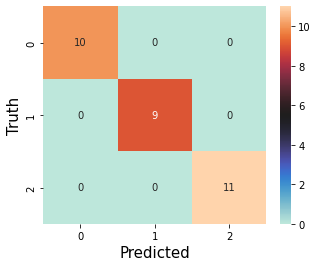

In [173]:
import seaborn as sns

plt.figure(figsize = (5,4))

#Anthing on the diagonal are the correct prediction

sns.heatmap(cm, cmap = 'icefire', annot = True)
plt.xlabel("Predicted", size = 15)
plt.ylabel("Truth", size = 15)

In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

